# Gradient descent

Gradient descent - a very simple and powerfull algorithm that is used to find a local minimum of a function. In this kernel I want to create a couple of animations and show how this algorithm works so lets start.

In [1]:
# Importing all necessary
import numpy as np
import gc
import os
import matplotlib.pyplot as plt

from matplotlib.animation import ArtistAnimation
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid
from IPython.display import Image, display, HTML

plt.style.use('bmh')

# "Classic" example

I want to start with something simple - the "classic" parabola example. To make it we need two things - function and derivative of that function.

As a function I'm going to use: $f(x)=x^2$

And we can easily calculate it's derivative: $f'(x)=2x$

First - let's define function and plot it:

In [2]:
# Main function
def f(x):
    return x**2

# Derivative of function
def f_prime(x):
    return 2 * x

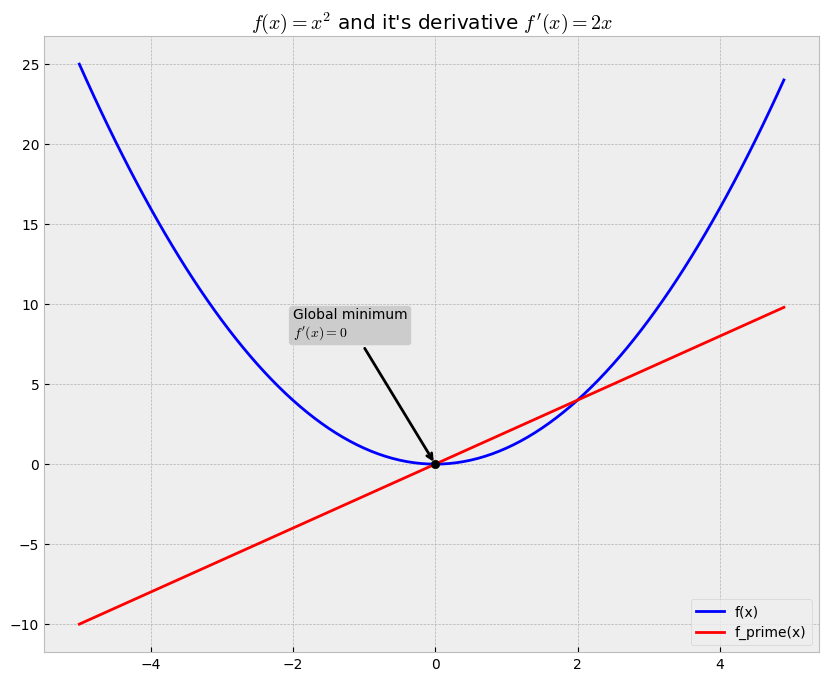

In [3]:
fig, ax = plt.subplots(figsize = (10, 8))

# Domain of function
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x), color = 'b', linewidth = 2, label = 'f(x)') # Plot the main function
plt.plot(x, f_prime(x), color = 'r', label = "f_prime(x)") # Plot the derivative of function
plt.scatter(0, 0, color = 'k', zorder = 2.5) # Global minimum of the function

# Annotations block
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle = '->', color = 'k', linewidth = 2)
ax.annotate('Global minimum\n$f\'(x)=0$', xy = (0, 0), xytext = (-2, 8), bbox = bbox_args, arrowprops=arrow_args)

plt.title("$f(x)=x^2$ and it's derivative $f'(x)=2x$")
plt.legend()
plt.show()

On a plot above we can see our parabola and it's derivative (red line). Derivative it's nothing more than instanteneous rate of change of the function in certain point. In that particular case - when derivative of our function is equal to 0 - then we are at global minimum of our function.

Now let's start realization of gradient descent algorithm.

The algorithm is very simple and can be divided in several steps:
1. Define a starting x coordinate, from which we want to descent to local/global minimum
2. Calculate derivative at this point
3. Subtract from starting point derivative at this point. To prevent divergence we need to multiply the derivative on small number "alpha", or learning rate.
4. Repeat from step 2

So the main gradient descent formula can be written as: $x_{next} = x_{start} - \alpha * derivative$

In [4]:
def gradient_descent(function, derivative, start_x = -4, x_domain = (-5, 5, 0.1), iterations = 1000, lr = 0.1, precision = 0.001, 
                     figsize = (10, 8), name = 'anim.gif', fps = 5):
    '''
    Creates an animation of gradient descent from specific point to the closest local minimum and saves it at the "name" name.
    function - described function, must be passed as function
    derivative - derivative of "function", must be passed as function
    start_x - starting X coordinate of point
    x_range - domain of function as tuple - (left_bound, right_bound, step)
    iterations - maximum number of iteration before stop
    lr - learning rate
    precision - desired precision of result, if step of gradient descent will be smalle than precision, then algorithm will stop
    figsize - size of a plot
    name - name of animation to save
    fps - fps of animation
    '''
    
    images = []    
    fig, ax = plt.subplots(figsize = figsize)
    x = np.arange(*x_domain)
    px = float(start_x) # Starting x coordinate

    # Function plot
    f = plt.plot(x, function(x), color = 'k')

    for frame in range(iterations):
        old_px = px # Saving old px value to calculate step

        # Plot point to track
        py = function(px) # Y coordinate of point    
        point = plt.scatter(px, py, color = 'r', zorder = 2.5)

        # Plot tangent line to the graph at (px, py) point
        slope = derivative(px)
        y_intercept = py - slope * px
        tx = np.arange(px - 1, px + 2, 2) # X coordinates of tangent line
        ty = slope * tx + y_intercept # Y coordinates of tangent line
        tangent = plt.plot(tx, ty, 'r--')    

        # Calculate new value of px
        px = px - lr * slope
        step = abs(old_px - px)

        # Plot text info
        bbox_args = dict(boxstyle="round", fc="0.8")
        arrow_args = dict(arrowstyle = '->', color = 'b', linewidth = 1)
        text = f'Iteration: {frame}\nPoint: ({px:.2f}, {py:.2f})\nSlope: {slope:.2f}\nStep: {step:.4f}'
        text = ax.annotate(text, xy = (px, py), xytext = (0.7, 0.9), textcoords = 'axes fraction', bbox = bbox_args, arrowprops=arrow_args, fontsize = 12)

        plt.title('Gradient descent animation')    
        
        # Stopping algorithm if desired precision have been met
        if step <= precision:
            text2 = plt.text(0.7, 0.1, 'Local minimum found', fontsize = 12, transform = ax.transAxes)
            images.append([f[0], tangent[0], point, text, text2])
            break

        images.append([f[0], tangent[0], point, text])

    anim = ArtistAnimation(fig, images) 
    anim.save(name, writer = 'imagemagic', fps = fps)

MovieWriter imagemagic unavailable; using Pillow instead.


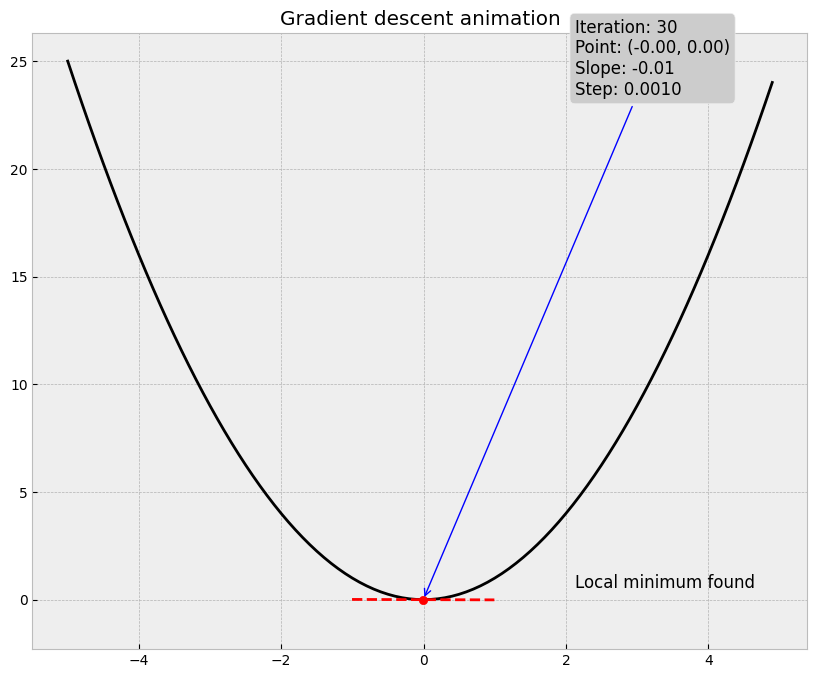

In [5]:
# Creating animation
gradient_descent(f, f_prime, start_x = -4, lr = 0.1, name = '../resources/classic.gif')

In [6]:
# Displaying animation
HTML('<img src="../resources/classic.gif" />')

# Sin(x) function

Let's try this on $f(x)=sin(x)$ function with random starting point:

MovieWriter imagemagic unavailable; using Pillow instead.


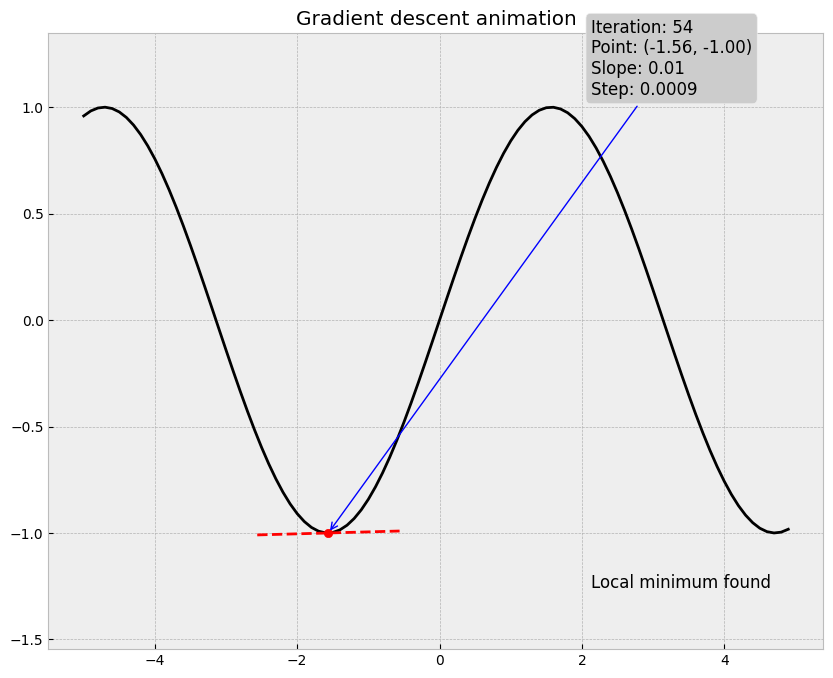

In [8]:
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

gradient_descent(f, f_prime, start_x = np.random.uniform(-5, 5), name = '../resources/sin.gif')

In [9]:
HTML('<img src="../resources/sin.gif" />')

# Gradient descent of multivariable function

Now let's take something more interesting - a multivariable function with 2 input variables and 1 output.

$f(x, y)=sin(\frac{1}{2}x^2-\frac{1}{4}y^2+3)cos(2x+1-e^y)$

As in previous example - to succesfully descent to local minimum we need to calculate derivaties but, because we have multivariable function, we need to calculate partial derivatives wit respect to X and Y:
1. Partial derivative with respect to X:

$\frac{\partial f}{\partial x}=xcos(\frac{1}{2}x^2-\frac{1}{4}y^2+3)cos(2x+1-e^y)-2sin(\frac{1}{2}x^2-\frac{1}{4}y^2+3)sin(2x+1-e^y)$

2. Partial derivative with respect to Y:

$\frac{\partial f}{\partial y}=-\frac{1}{2}ycos(\frac{1}{2}x^2-\frac{1}{4}y^2+3)cos(2x+1-e^y)+e^ysin(\frac{1}{2}x^2-\frac{1}{4}y^2+3)sin(2x+1-e^y)$

These partial derivatives are necessary parts of gradient - the vector, wich shows direction of steepest ascend of the function:

$\nabla f(x, y)=\begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}$

So, if we take opposite of that vector - it will show us the direction of steepest descent. First - let's plot the function to see how it looks like.

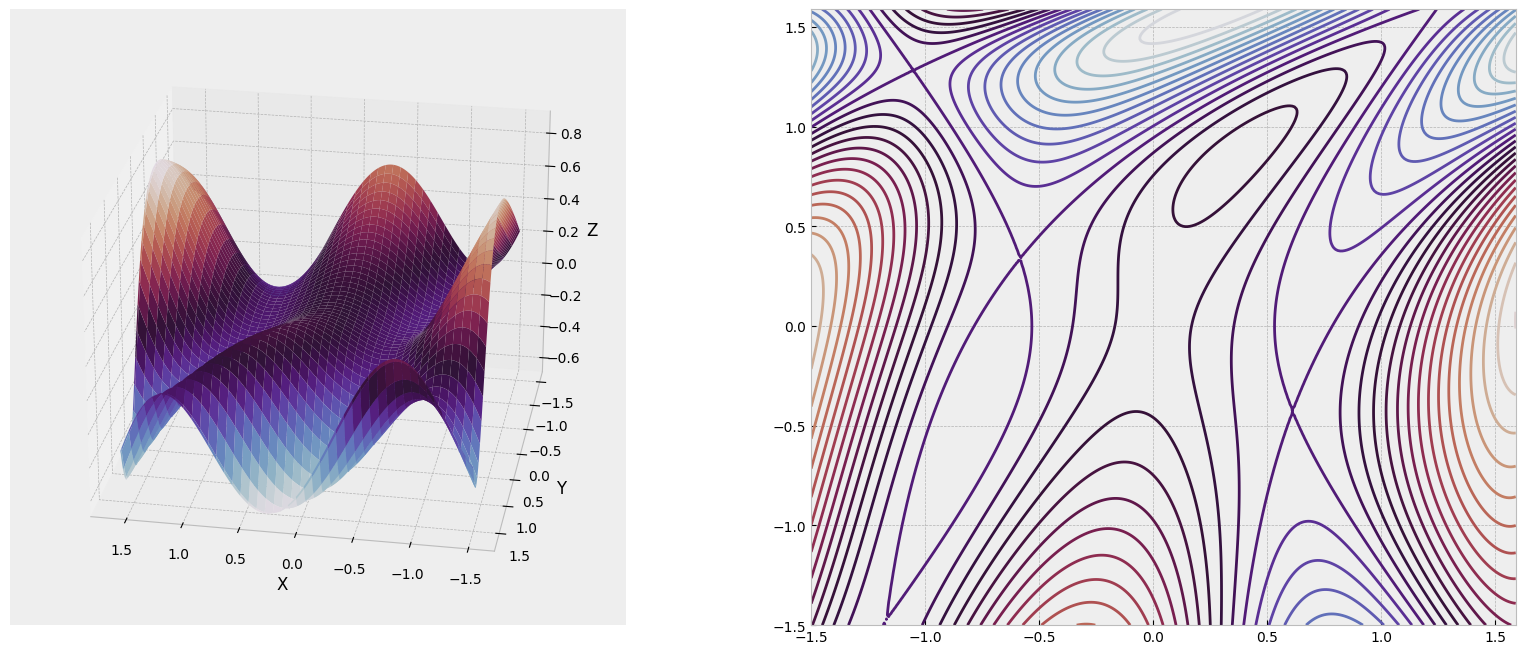

In [10]:
# Defining main function and partial derivatives
def f(x, y):
    return np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y)

def partial_x(x, y):
    return x * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y) - 2 * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2 * x + 1 - np.e**y)

def partial_y(x, y):
    return -1/2 * y * np.cos(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2 * x + 1 - np.e**y) + np.e**y * np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.sin(2 * x + 1 - np.e**y)


# Domain of function
x = np.arange(-1.5, 1.6, 0.01)
y = np.arange(-1.5, 1.6, 0.01)

# Creating (x, y) pairs and calculating Z coordiante
X, Y = meshgrid(x, y)
Z = f(X, Y)

# Plot function
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'twilight')
ax.view_init(25, 100)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

fig.add_subplot(1, 2, 2)
plt.contour(X, Y, Z, levels = 30, cmap = 'twilight')

plt.show()

Now the most interesting part - animation of gradient descent of multivariable function. In this example I want to take 7 points in different parts of the plot and to apply gradient descent algorithm to each of these points:

MovieWriter imagemagic unavailable; using Pillow instead.


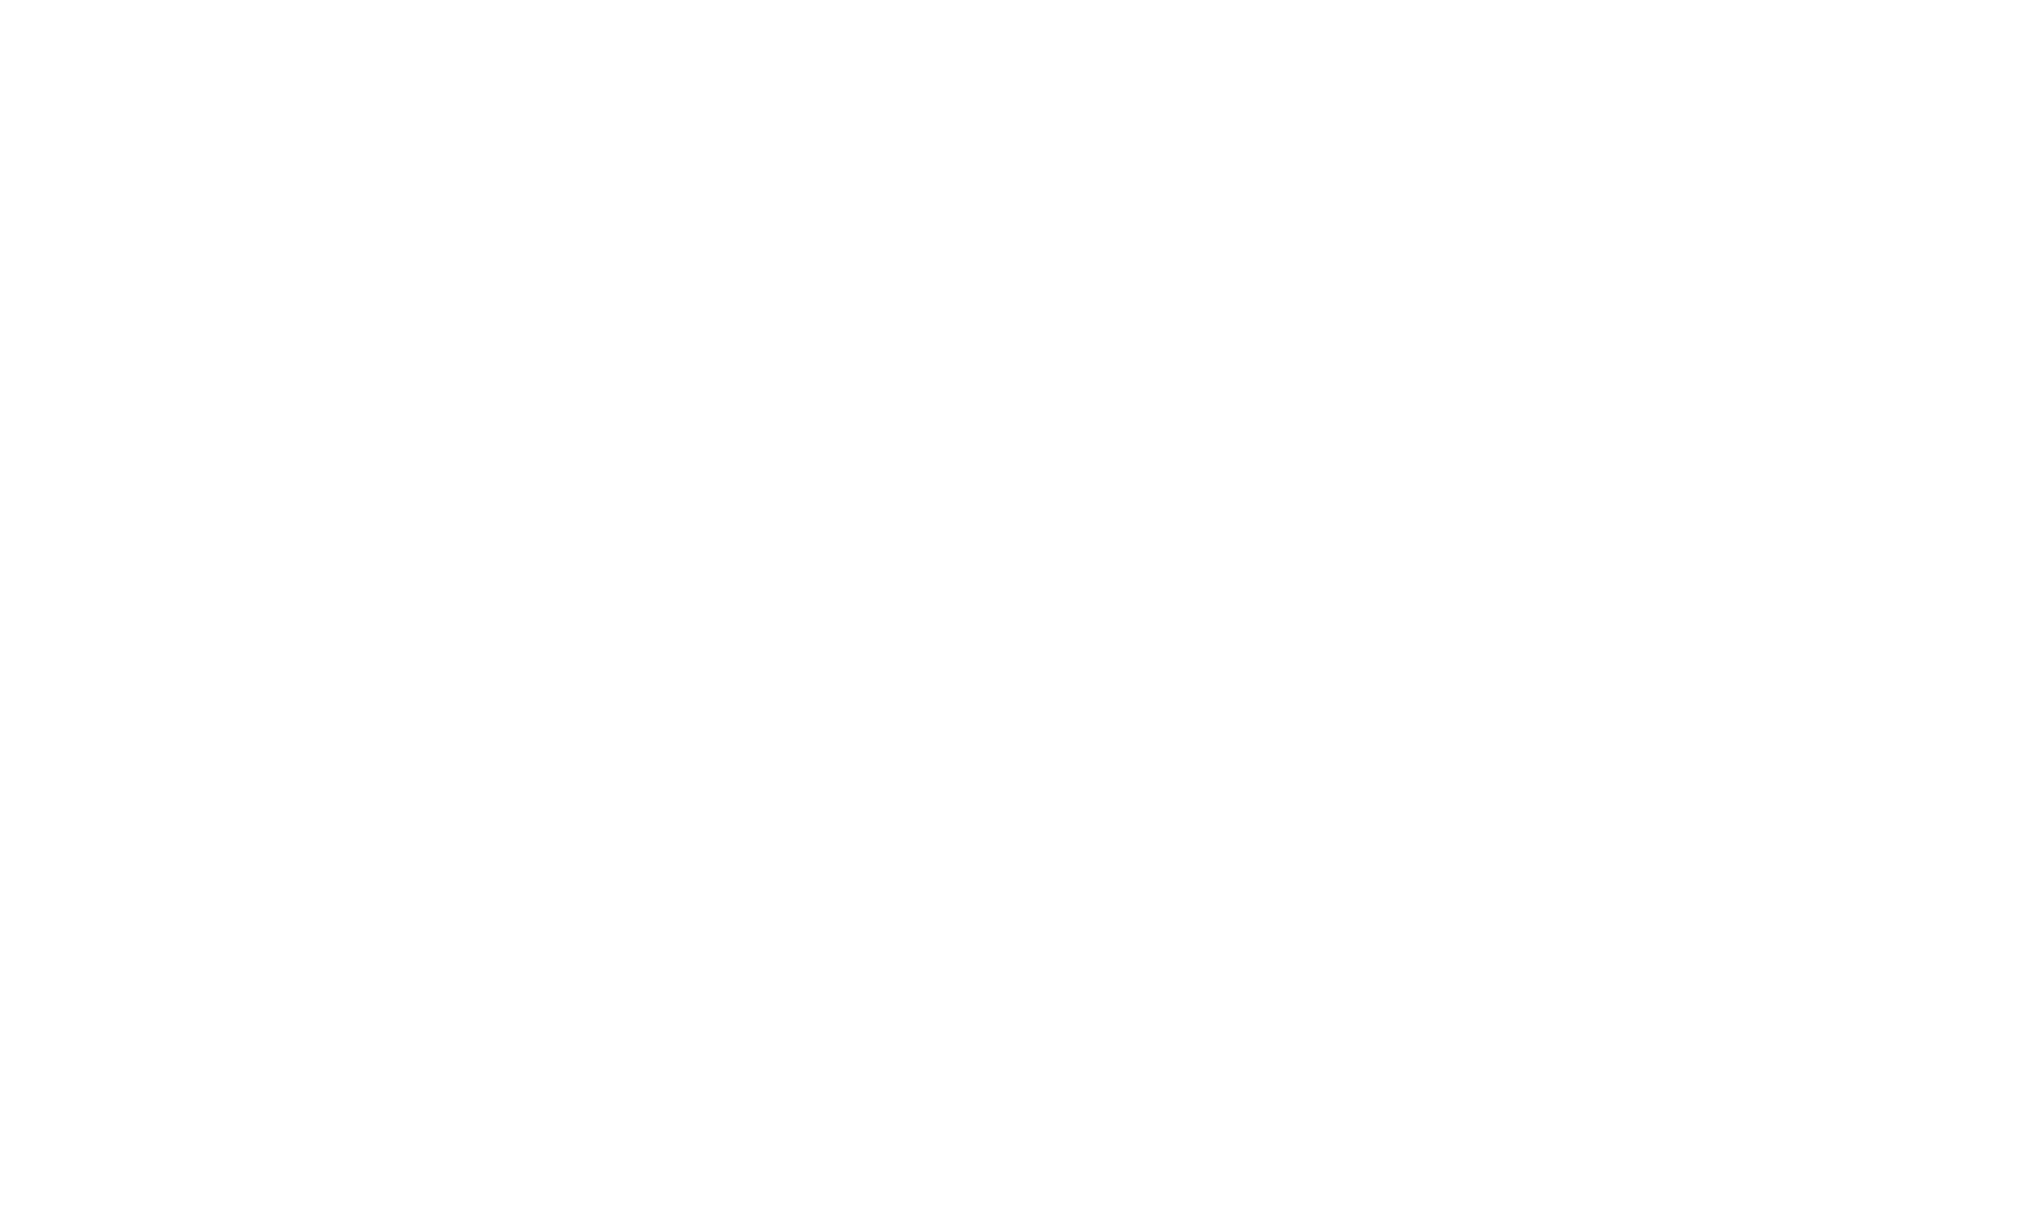

In [11]:
# List to store images
images = []

# Function domain
x = np.arange(-1.5, 1.6, 0.01)
y = np.arange(-1.5, 1.6, 0.01)

# Creating (x, y) pairs and calculating Z coordiante
X, Y = meshgrid(x, y)
Z = f(X, Y)

iterations = 200 # number of iterations before algorithm will stop
lr = 0.01 # Learning rate

# Plot main function
fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'twilight', alpha = 0.9)
ax.view_init(45, 45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Starting coordinates of points
px = np.array([-0.25, 0, 1.25, -1.25, 0, 0.25, -1])
py = np.array([-1.25, -1.25, 0.25, 0.25, 0, 0.75, -1])

# Main algorithm cycle
for frame in range(iterations):
    # Calculating Z-coordinate for each point
    pz = [f(p[0], p[1]) for p in zip(px, py)]
    
    # Plot points
    points = ax.plot(px, py, pz, marker = '.', linestyle = 'None', color = 'r', markersize = 10, zorder = 2.5)
    
    # Calculating partial derivatives for each point
    gx = np.array([partial_x(p[0], p[1]) for p in zip(px, py)])
    gy = np.array([partial_y(p[0], p[1]) for p in zip(px, py)])
    
    # Subtract partial derivatives from x and y coordinates
    px = px - lr * gx
    py = py - lr * gy
    
    images.append([ax, points[0]])

anim = ArtistAnimation(fig, images) 
anim.save('../resources/multivar.gif', writer = 'imagemagic', fps = 20)

In [12]:
HTML('<img src="../resources/multivar.gif" />')